# UZOP Projekt


## Collection and Validation of Psychophysiological
## Data from Professional and Amateur Players:
## a Multimodal eSports Dataset

U radu je mjereno psihofiziološko stanje 10 igrača tijekom 22 meča MOBA igrice League of legends.
Od 10 igrača, 5 ih je amatera, a 5 profesionalnih.

Svaki tim je odigrao 11 mečeva od kojih su:
3 bez komunikacije u timu protiv pravih igrača iste vještine
3 sa komunikacijom protiv pravih igrača iste vještine
2 bez komunikacije protiv botova
3 sa komunikacijom protiv botova

Skupljeni podaci senzora:
Pokreti ruku - imu_left_hand.csv, imu_right_hand.csv
Pokreti stolice - imu_chair_back.csv, imu_chair_seat.csv
Pokreti glave - imu_head.csv
Pogled - eye_tracker.csv
Elektrodermalna aktivnost - gsr.csv
Otkucaji srca - heart_rate.csv
Aktivnost mišića - emg.csv
Aktivnost mozga - eeg_band_power.csv, eeg_metrics.csv
Temperatura lica - facial_skin_temperature.csv
Aktivnost tipkovnice - keyboard.csv
Aktivnost miša - mouse.csv
Zasićenost kisikom - spo2.csv
Podaci o okolini - environment.csv

Ostali podaci:
Meta podaci o meču - meta_info.json
Zapis događaja tijekom meča - replay.json
Povratne informacije igrača nakon meča - player_report.json

## Dodavanje potrebnih biblioteka

In [1465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Podaci o trećem meču učitani iz meta_info.json

In [1466]:
metaData = pd.read_json("eSports_Sensors_Dataset/matches/match_3/meta_info.json", orient="index")
print(metaData)

                            0
match_duration           1592
season_id                  13
game_version    9.22.296.5720
real_opponents              1
communication               0
team                 amateurs
day_num                     0
day_match_num               3


## Učitavanje podataka senzora igrača iz meča bez komunikacije protiv pravih igrača

In [1467]:
eegMetrics_ama = pd.read_csv("eSports_Sensors_Dataset/matches/match_3/player_1/eeg_metrics.csv")
emg_ama = pd.read_csv("eSports_Sensors_Dataset/matches/match_3/player_1/emg.csv")
eyeTracker_ama = pd.read_csv("eSports_Sensors_Dataset/matches/match_3/player_1/eye_tracker.csv")
facialSkin_ama = pd.read_csv("eSports_Sensors_Dataset/matches/match_3/player_1/facial_skin_temperature.csv")
gsr_ama = pd.read_csv("eSports_Sensors_Dataset/matches/match_3/player_1/gsr.csv")
heartRate_ama = pd.read_csv("eSports_Sensors_Dataset/matches/match_3/player_1/heart_rate.csv")
imuChairBack_ama = pd.read_csv("eSports_Sensors_Dataset/matches/match_3/player_1/imu_chair_back.csv")
imuChairSeat_ama = pd.read_csv("eSports_Sensors_Dataset/matches/match_3/player_1/imu_chair_seat.csv")
imuLeftHand_ama = pd.read_csv("eSports_Sensors_Dataset/matches/match_3/player_1/imu_left_hand.csv")
imuRightHand_ama = pd.read_csv("eSports_Sensors_Dataset/matches/match_3/player_1/imu_right_hand.csv")
imuHead_ama = pd.read_csv("eSports_Sensors_Dataset/matches/match_3/player_1/imu_head.csv")
keyboard_ama = pd.read_csv("eSports_Sensors_Dataset/matches/match_3/player_1/keyboard.csv")
mouse_ama = pd.read_csv("eSports_Sensors_Dataset/matches/match_3/player_1/mouse.csv")
o2Saturation_ama = pd.read_csv("eSports_Sensors_Dataset/matches/match_3/player_1/spo2.csv")

## Početni pregled podataka

### Aktivnost mozga

In [1468]:
eegMetrics_ama.shape

(1588, 7)

In [1469]:
eegMetrics_ama.head()

,time,Engagement,Excitement,Stress,Relaxation,Interest,Focus
0,0.0,0.556424,0.343362,0.372889,0.374140,0.526667,0.471662
1,1.0,0.563887,0.340924,0.370238,0.369393,0.524623,0.478231
2,2.0,0.572415,0.338138,0.367209,0.363969,0.522288,0.485738
3,3.0,0.581797,0.335074,0.363876,0.358002,0.519718,0.493996
4,4.0,0.591811,0.331802,0.360319,0.351632,0.516976,0.502811


In [1470]:
eegMetrics_ama.columns.values

array(['time', 'Engagement', 'Excitement', 'Stress', 'Relaxation',
       'Interest', 'Focus'], dtype=object)

Značajke eegMetrics_ama:
time - vrijeme u minutama
engagement - aktivnost mozga
excitement - uzbuđenje
stress - stres
relaxation - opuštenost
interest - interes
focus - fokus

### Aktivnost mišića

In [1471]:
emg_ama.shape

(1593, 3)

In [1472]:
emg_ama.head()

,time,emg_right_hand,emg_left_hand
0,0.0,5.928571,7.071429
1,1.0,7.150794,6.801587
2,2.0,5.949643,6.845280
3,3.0,5.378126,5.991212
4,4.0,6.137803,6.666715


In [1473]:
emg_ama.columns.values

array(['time', 'emg_right_hand', 'emg_left_hand'], dtype=object)

Značajke emg_ama:
time - vrijeme u minutama
emg_right_hand - kontrakcija mišića desne ruke
emg_left_hand - kontrakcija mišića lijeve ruke



### Praćenje pogleda

In [1474]:
eyeTracker_ama.shape

(1592, 3)

In [1475]:
eyeTracker_ama.head()

,time,gaze_movement,pupil_diameter
0,0.0,2747.526039,4.621058
1,1.0,2475.337210,4.522496
2,2.0,2856.365637,4.512538
3,3.0,1601.237059,4.487380
4,4.0,2672.972754,4.553411


In [1476]:
eyeTracker_ama.columns.values

array(['time', 'gaze_movement', 'pupil_diameter'], dtype=object)

Značajke eyeTracker_ama:
time - vrijeme u minutama
gaze_movement - kretanje pogleda
pupil_diameter - promjer zjenice

### Temperatura lica

In [1477]:
facialSkin_ama.shape

(73, 2)

In [1478]:
facialSkin_ama.head()

,time,facial_skin_temperature
0,1.0,35.224500
1,2.0,35.218567
2,3.0,35.211786
3,4.0,35.204327
4,5.0,35.196365


In [1479]:
facialSkin_ama.columns.values

array(['time', 'facial_skin_temperature'], dtype=object)

Značajke facialSkin_ama:
time - vrijeme u minutama
facial_skin_temperature - temperatura kože lica u stupnjevima celzijusa



### Elektrodermalna aktivnost

In [1480]:
gsr_ama.shape

(1593, 2)

In [1481]:
gsr_ama.head()

,time,gsr
0,0.0,27458.488272
1,1.0,27547.022201
2,2.0,27654.406824
3,3.0,27836.016424
4,4.0,27882.153697


In [1482]:
gsr_ama.columns.values

array(['time', 'gsr'], dtype=object)

Značajke gsr_ama:
time - vrijeme u minutama
gsr - provodljivost kože



### Otkucaji srca

In [1483]:
heartRate_ama.shape

(24, 2)

In [1484]:
heartRate_ama.head()

,time,heart_rate
0,0.0,66.000000
1,1.0,65.333333
2,2.0,65.142857
3,3.0,65.066667
4,4.0,65.032258


In [1485]:
heartRate_ama.columns.values

array(['time', 'heart_rate'], dtype=object)

Značajke heartRate_ama:
time - vrijeme u minutama
heart_rate - broj otkucaja srca po minuti



### Pokreti stolice, ruku i glave

In [1486]:
imuChairBack_ama.shape

(1593, 17)

In [1487]:
imuChairBack_ama.head()

,time,linaccel_x,linaccel_y,linaccel_z,gravity_x,gravity_y,gravity_z,gyro_x,gyro_y,gyro_z,euler_x,euler_y,euler_z,quaternion_w,quaternion_y,quaternion_x,quaternion_z
0,0.0,0.006000,-0.280462,0.074000,0.03,-9.74,-1.12,-0.050000,-0.009615,0.004808,345.125,0.125,96.5,0.659912,-0.098877,-0.739807,0.086121
1,1.0,0.003111,-0.278639,0.074061,0.03,-9.74,-1.12,0.002904,0.003108,0.007916,345.125,0.125,96.5,0.659912,-0.098877,-0.739807,0.086121
2,2.0,0.002405,-0.279595,0.074597,0.03,-9.74,-1.12,0.017986,0.003006,0.019017,345.125,0.125,96.5,0.659912,-0.098877,-0.739807,0.086121
3,3.0,0.002517,-0.279893,0.076740,0.03,-9.74,-1.12,-0.000325,0.004993,-0.000356,345.125,0.125,96.5,0.659912,-0.098877,-0.739807,0.086121
4,4.0,0.002409,-0.280901,0.077946,0.03,-9.74,-1.12,0.028627,-0.007510,-0.020520,345.125,0.125,96.5,0.659912,-0.098877,-0.739807,0.086121


In [1488]:
imuChairBack_ama.columns.values

array(['time', 'linaccel_x', 'linaccel_y', 'linaccel_z', 'gravity_x',
       'gravity_y', 'gravity_z', 'gyro_x', 'gyro_y', 'gyro_z', 'euler_x',
       'euler_y', 'euler_z', 'quaternion_w', 'quaternion_y',
       'quaternion_x', 'quaternion_z'], dtype=object)

In [1489]:
imuChairSeat_ama.shape

(1593, 17)

In [1490]:
imuChairSeat_ama.head()

,time,linaccel_x,linaccel_y,linaccel_z,gravity_x,gravity_y,gravity_z,gyro_x,gyro_y,gyro_z,euler_x,euler_y,euler_z,quaternion_w,quaternion_y,quaternion_x,quaternion_z
0,0.0,0.127077,-0.051538,0.068769,-0.07,-1.26,-9.72,0.009615,0.040385,-0.016346,160.9375,-0.4375,172.5625,0.063293,-0.165039,-0.984131,0.014709
1,1.0,0.129026,-0.052533,0.069489,-0.07,-1.26,-9.72,-0.023310,0.031138,-0.004186,160.9375,-0.4375,172.5625,0.063293,-0.165039,-0.984131,0.014709
2,2.0,0.129493,-0.052425,0.067370,-0.07,-1.26,-9.72,-0.020593,0.016135,0.001554,160.9375,-0.4375,172.5625,0.063293,-0.165039,-0.984131,0.014709
3,3.0,0.130748,-0.051624,0.067296,-0.07,-1.26,-9.72,-0.010636,0.012658,-0.010557,160.9375,-0.4375,172.5625,0.063293,-0.165039,-0.984131,0.014709
4,4.0,0.131553,-0.051739,0.067103,-0.07,-1.26,-9.72,-0.005146,0.000666,-0.001138,160.9375,-0.4375,172.5625,0.063293,-0.165039,-0.984131,0.014709


In [1491]:
imuChairSeat_ama.columns.values

array(['time', 'linaccel_x', 'linaccel_y', 'linaccel_z', 'gravity_x',
       'gravity_y', 'gravity_z', 'gyro_x', 'gyro_y', 'gyro_z', 'euler_x',
       'euler_y', 'euler_z', 'quaternion_w', 'quaternion_y',
       'quaternion_x', 'quaternion_z'], dtype=object)

In [1492]:
imuLeftHand_ama.shape

(1593, 17)

In [1493]:
imuLeftHand_ama.head()

,time,linaccel_x,linaccel_y,linaccel_z,gravity_x,gravity_y,gravity_z,gyro_x,gyro_y,gyro_z,euler_x,euler_y,euler_z,quaternion_w,quaternion_y,quaternion_x,quaternion_z
0,0.0,-0.135714,0.012143,-0.014762,-1.258095,1.688810,9.570000,-0.346726,0.038690,-0.090774,86.937500,-7.364583,-9.992560,0.721341,-0.012710,0.107522,-0.684072
1,1.0,-0.127619,0.010873,-0.011111,-1.296825,1.677222,9.568413,-0.175099,0.029762,-0.222718,86.937500,-7.598710,-9.955853,0.721247,-0.010981,0.108592,-0.684030
2,2.0,-0.131070,0.011907,-0.010476,-1.300033,1.670447,9.569320,-0.217029,-0.200660,-0.152071,86.947082,-7.618959,-9.922718,0.721158,-0.010683,0.108484,-0.684138
3,3.0,-0.136353,0.006727,-0.008791,-1.278162,1.662144,9.572674,-0.263069,-0.223722,-0.160397,86.975305,-7.485596,-9.874504,0.721145,-0.011245,0.107408,-0.684307
4,4.0,-0.132945,0.000675,-0.005931,-1.272401,1.654457,9.576455,-0.172453,-0.285672,-0.209870,86.996922,-7.452708,-9.810244,0.721017,-0.011122,0.106833,-0.684537


In [1494]:
imuLeftHand_ama.columns.values

array(['time', 'linaccel_x', 'linaccel_y', 'linaccel_z', 'gravity_x',
       'gravity_y', 'gravity_z', 'gyro_x', 'gyro_y', 'gyro_z', 'euler_x',
       'euler_y', 'euler_z', 'quaternion_w', 'quaternion_y',
       'quaternion_x', 'quaternion_z'], dtype=object)

In [1495]:
imuRightHand_ama.shape

(1593, 17)

In [1496]:
imuRightHand_ama.head()

,time,linaccel_x,linaccel_y,linaccel_z,gravity_x,gravity_y,gravity_z,gyro_x,gyro_y,gyro_z,euler_x,euler_y,euler_z,quaternion_w,quaternion_y,quaternion_x,quaternion_z
0,0.0,-0.063095,-0.022619,0.022857,2.389048,1.730238,9.346429,-0.319940,-0.552083,0.095238,122.248512,14.105655,-10.471726,-0.477023,0.137977,0.065047,0.865548
1,1.0,-0.048810,-0.021984,0.021429,2.442698,1.717381,9.333889,0.050099,-0.098710,0.021825,122.284226,14.426091,-10.414187,-0.476597,0.138766,0.067797,0.865428
2,2.0,-0.027190,-0.022244,0.016292,2.528264,1.691700,9.314942,-0.370515,-1.571050,-0.150925,122.360487,14.940450,-10.284651,-0.475785,0.139776,0.072438,0.865316
3,3.0,-0.039225,-0.016234,0.016969,2.652897,1.670110,9.283168,-0.102988,0.246518,-0.070432,122.524325,15.694161,-10.179992,-0.474190,0.141821,0.078857,0.865284
4,4.0,-0.014722,-0.009662,0.014146,2.715918,1.638440,9.267468,-0.391769,-3.071846,-0.276015,122.580319,16.088304,-10.015319,-0.473561,0.142033,0.082692,0.865157


In [1497]:
imuRightHand_ama.columns.values

array(['time', 'linaccel_x', 'linaccel_y', 'linaccel_z', 'gravity_x',
       'gravity_y', 'gravity_z', 'gyro_x', 'gyro_y', 'gyro_z', 'euler_x',
       'euler_y', 'euler_z', 'quaternion_w', 'quaternion_y',
       'quaternion_x', 'quaternion_z'], dtype=object)

Značajke imuChairBack_0, imuChairSeat_0, imuLeftHand_0, imuRightHand_0:
time - vrijeme u minutama
linaccel_x - linearno ubrzanje na x osi
linaccel_y - linearno ubrzanje na y osi
linaccel_z - linearno ubrzanje na z osi
gravity_x - ubrzanje gravitacije na x osi
gravity_y - ubrzanje gravitacije na y osi
gravity_z - ubrzanje gravitacije na z osi
gyro_x - rotacijska brzina oko x osi
gyro_y - rotacijska brzina oko y osi
gyro_z - rotacijska brzina oko z osi
euler_x - eulerov kut x osi
euler_y - eulerov kut y osi
euler_z - eulerov kut z osi
quaternion_w - vrijednost w kvaterniona
quaternion_y - vrijednost y kvaterniona
quaternion_x - vrijednost x kvaterniona
quaternion_z - vrijednost z kvaterniona

In [1498]:
imuHead_ama.shape

(1592, 4)

In [1499]:
imuHead_ama.head()

,time,rot_x,rot_y,rot_z
0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0


In [1500]:
imuHead_ama.columns.values

array(['time', 'rot_x', 'rot_y', 'rot_z'], dtype=object)

Značajke imuHead_ama:
time - vrijeme u minutama
rot_x - rotacija glave oko x osi
rot_y - rotacija glave oko y osi
rot_z - rotacija glave oko z osi

### Tipkovnica

In [1501]:
keyboard_ama.shape

(1593, 2)

In [1502]:
keyboard_ama.head()

,time,buttons_pressed
0,0.0,0.0
1,1.0,0.0
2,2.0,0.0
3,3.0,0.0
4,4.0,0.0


In [1503]:
keyboard_ama.columns.values

array(['time', 'buttons_pressed'], dtype=object)

Značajke keyboard_ama:
time - vrijeme u minutama
buttons_pressed - broj pritisnutih tipki

### Miš

In [1504]:
mouse_ama.shape

(1592, 3)

In [1505]:
mouse_ama.head()

,time,mouse_movement,mouse_clicks
0,0.0,1512.203046,1.0000
1,1.0,2625.344249,1.5000
2,2.0,2505.449371,3.7500
3,3.0,1986.794607,1.8750
4,4.0,4464.766116,0.9375


In [1506]:
mouse_ama.columns.values

array(['time', 'mouse_movement', 'mouse_clicks'], dtype=object)

Značajke mouse_ama:
time - vrijeme u minutama
mouse_movement - kretanje miša
mouse_clicks - klikovi mišem

### Zasićenost kisikom

In [1507]:
o2Saturation_ama.shape

(1585, 2)

In [1508]:
o2Saturation_ama.head()

,time,spo2
0,5.0,99.854424
1,6.0,99.736685
2,7.0,99.602127
3,8.0,99.454113
4,9.0,99.296115


In [1509]:
o2Saturation_ama.columns.values

array(['time', 'spo2'], dtype=object)

Značajke o2Saturation_0:
time - vrijeme u minutama
spo2 - postotak zasićenosti kisikom

## Deskriptivna analiza

In [1510]:
replay_m3 = pd.read_json("eSports_Sensors_Dataset/matches/match_3/replay.json", typ="series", orient="index")
kills_m3 = replay_m3["player_1"]["killTimes"]
deaths_m3 = replay_m3["player_1"]["deathTimes"]

kills_m3 = np.round(kills_m3, 0)
deaths_m3 = np.round(deaths_m3, 0)

### Aktivnost mozga

              time   Engagement   Excitement       Stress   Relaxation  \
count  1588.000000  1588.000000  1588.000000  1588.000000  1588.000000   
mean    793.500000     0.557478     0.394072     0.355242     0.352916   
std     458.560429     0.090772     0.181272     0.043825     0.080306   
min       0.000000     0.195258     0.188626     0.263240     0.245416   
25%     396.750000     0.505800     0.230695     0.323839     0.293903   
50%     793.500000     0.564340     0.339967     0.341835     0.330432   
75%    1190.250000     0.621471     0.529323     0.373425     0.391684   
max    1587.000000     0.759162     0.827265     0.516677     0.640684   

          Interest        Focus  
count  1588.000000  1588.000000  
mean      0.504966     0.409063  
std       0.030718     0.112209  
min       0.483878     0.112941  
25%       0.490834     0.330115  
50%       0.494924     0.418875  
75%       0.504715     0.492250  
max       0.708061     0.646209  
time          1588
Engageme

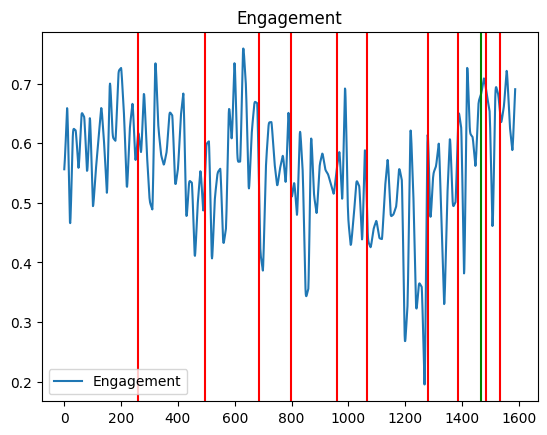

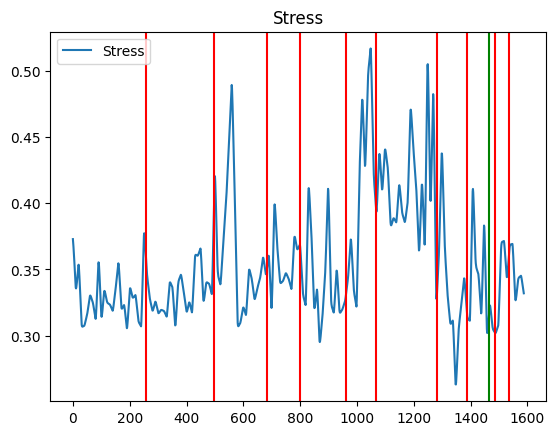

In [1511]:
print(eegMetrics_ama.describe())
print(eegMetrics_ama.nunique())

eegMetrics_ama.plot(y=[1], title="Engagement")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

eegMetrics_ama.plot(y=[3], title="Stress")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

### Aktivnost mišića

              time  emg_right_hand  emg_left_hand
count  1593.000000     1593.000000    1593.000000
mean    796.000000       11.718149       8.784216
std     460.003804       10.230218       3.427746
min       0.000000        4.341739       1.956530
25%     398.000000        7.413596       6.845280
50%     796.000000        8.555730       9.030345
75%    1194.000000       10.982263      10.538571
max    1592.000000      118.361838      49.902548
time              1593
emg_right_hand    1592
emg_left_hand     1592
dtype: int64


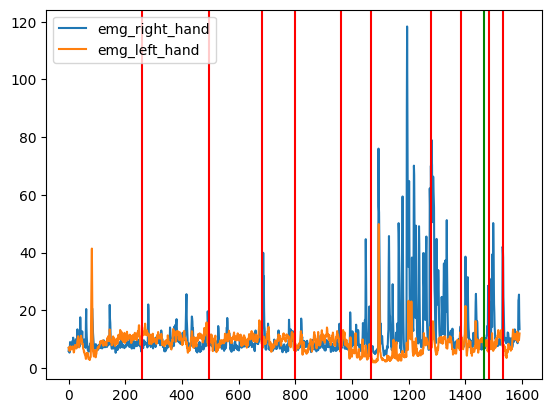

In [1512]:
print(emg_ama.describe())
print(emg_ama.nunique())

emg_ama.plot(y = [1, 2])
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

### Praćenje pogleda

              time  gaze_movement  pupil_diameter
count  1592.000000    1592.000000     1592.000000
mean    795.500000    1642.998473        4.563371
std     459.715129     736.402289        0.329757
min       0.000000       0.000000        3.620024
25%     397.750000    1085.787439        4.356494
50%     795.500000    1557.365235        4.563037
75%    1193.250000    2115.380799        4.769361
max    1591.000000    5425.627305        5.801210
time              1592
gaze_movement     1579
pupil_diameter    1592
dtype: int64


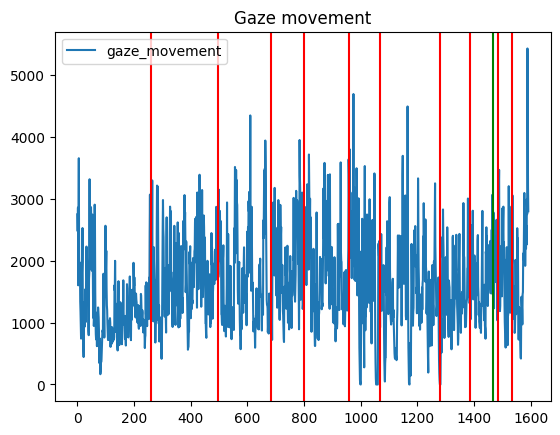

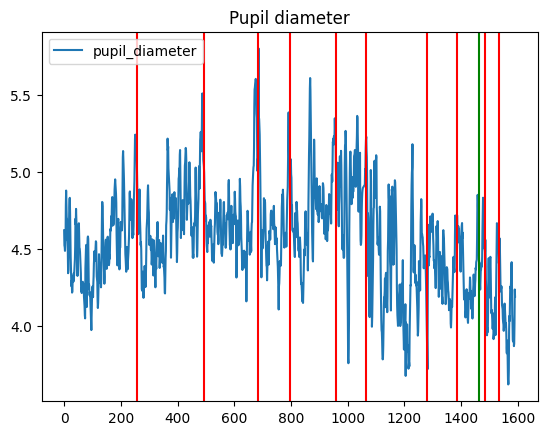

In [1513]:
print(eyeTracker_ama.describe())
print(eyeTracker_ama.nunique())

eyeTracker_ama.plot(y=[1], title="Gaze movement")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

eyeTracker_ama.plot(y=[2], title="Pupil diameter")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

### Temperatura lica

            time  facial_skin_temperature
count  73.000000                73.000000
mean   37.000000                35.234216
std    21.217131                 0.156822
min     1.000000                34.706132
25%    19.000000                35.175987
50%    37.000000                35.263320
75%    55.000000                35.341610
max    73.000000                35.476516
time                       73
facial_skin_temperature    73
dtype: int64


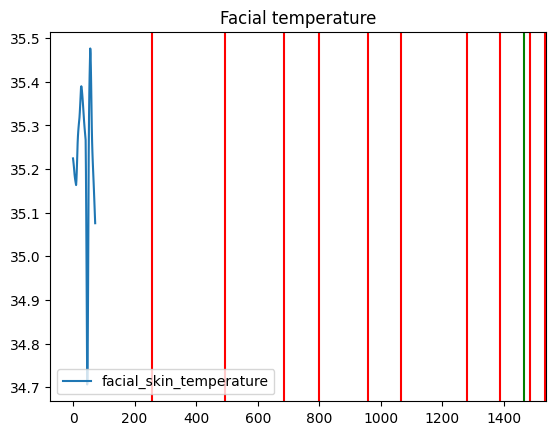

In [1514]:
print(facialSkin_ama.describe())
print(facialSkin_ama.nunique())

facialSkin_ama.plot(y=[1], title="Facial temperature")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

Podaci za temperaturu lica skoro za cijelo vrijeme igre nedostaju i nemoguće ih je zamijeniti tako da će se morati odbaciti u potpunosti za igrača 1.

### Elektrodermalna aktivnost

              time           gsr
count  1593.000000   1593.000000
mean    796.000000  30561.080184
std     460.003804   2271.414500
min       0.000000  20921.901262
25%     398.000000  29046.515550
50%     796.000000  30757.228962
75%    1194.000000  32307.969641
max    1592.000000  37201.961025
time    1593
gsr     1593
dtype: int64


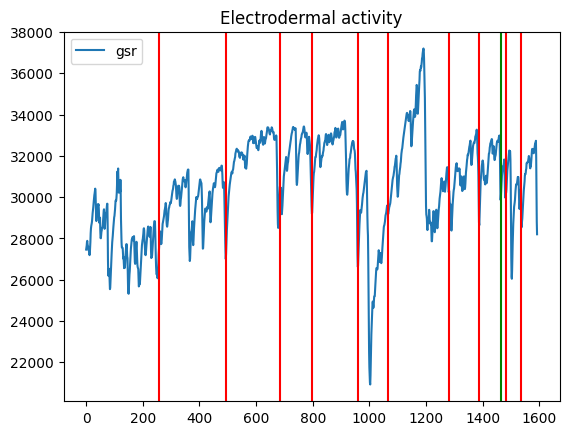

In [1515]:
print(gsr_ama.describe())
print(gsr_ama.nunique())

gsr_ama.plot(y=[1], title="Electrodermal activity")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

### Otkucaji srca

            time  heart_rate
count  24.000000   24.000000
mean   11.500000   67.398963
std     7.071068    1.777630
min     0.000000   65.000000
25%     5.750000   65.879032
50%    11.500000   67.532258
75%    17.250000   68.395161
max    23.000000   70.870968
time          24
heart_rate    24
dtype: int64


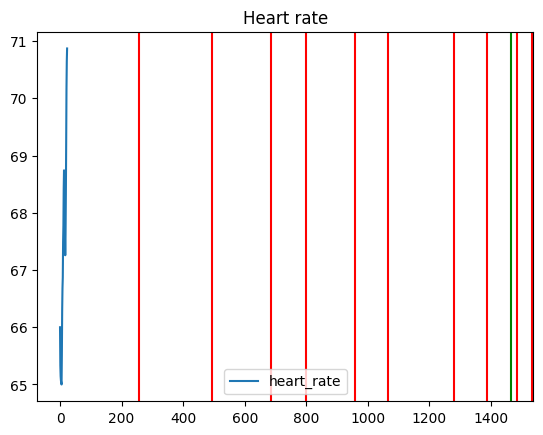

In [1516]:
print(heartRate_ama.describe())
print(heartRate_ama.nunique())

heartRate_ama.plot(y=[1], title="Heart rate")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

Također skoro u potpunosti nedostaju podaci tako da se i oni odbacuju.

### Pokreti stolice

              time   linaccel_x   linaccel_y   linaccel_z    gravity_x  \
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000   
mean    796.000000     0.051630    -0.007726     0.063171    -0.005811   
std     460.003804     0.052107     0.058292     0.009065     0.057600   
min       0.000000    -0.104636    -0.104614     0.042733    -0.120136   
25%     398.000000     0.022234    -0.054989     0.056948    -0.040000   
50%     796.000000     0.045575    -0.013266     0.063523     0.000000   
75%    1194.000000     0.078915     0.023602     0.069362     0.020000   
max    1592.000000     0.147508     0.126961     0.081880     0.161680   

         gravity_y    gravity_z       gyro_x       gyro_y       gyro_z  \
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000   
mean     -1.284724    -9.717201     0.002104     0.000686     0.014395   
std       0.061040     0.008940     0.040293     0.047587     0.467208   
min      -1.400000    -9.730000    -0

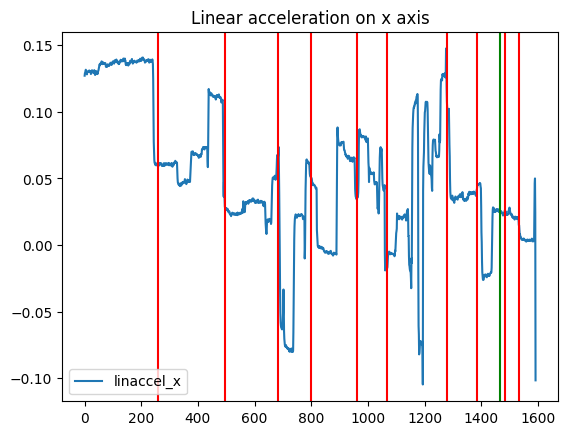

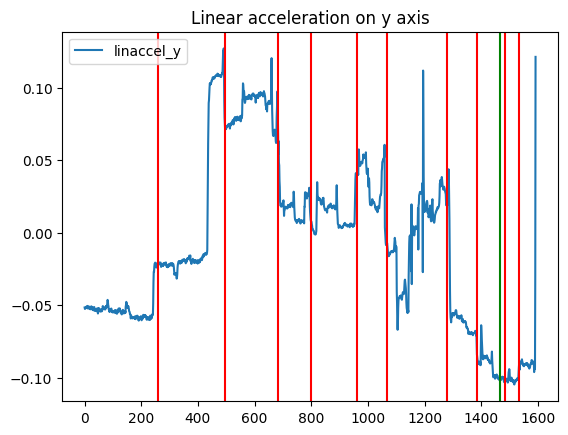

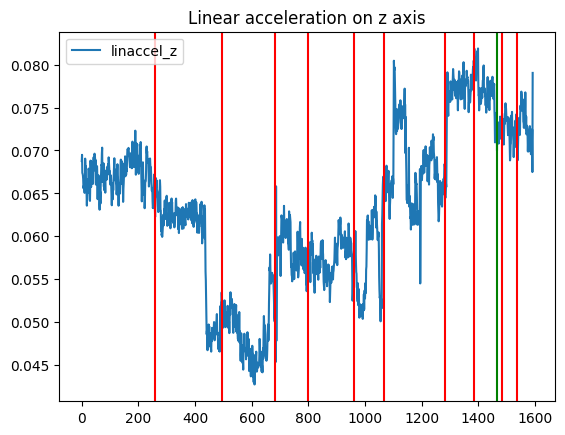

In [1517]:
print(imuChairSeat_ama.describe())
print(imuChairSeat_ama.nunique())

imuChairSeat_ama.plot(y=[1], title="Linear acceleration on x axis")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

imuChairSeat_ama.plot(y=[2], title="Linear acceleration on y axis")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

imuChairSeat_ama.plot(y=[3], title="Linear acceleration on z axis")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

              time   linaccel_x   linaccel_y   linaccel_z    gravity_x  \
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000   
mean    796.000000    -0.003492    -0.274619     0.035723     0.034083   
std     460.003804     0.020448     0.007416     0.055761     0.024537   
min       0.000000    -0.118325    -0.319634    -0.117310    -0.055753   
25%     398.000000    -0.009182    -0.280224     0.000478     0.020000   
50%     796.000000     0.000821    -0.275249     0.034258     0.030000   
75%    1194.000000     0.005782    -0.269094     0.081989     0.050000   
max    1592.000000     0.102831    -0.249408     0.139624     0.117403   

         gravity_y    gravity_z       gyro_x       gyro_y       gyro_z  \
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000   
mean     -9.750292    -0.991889    -0.007903     0.010780    -0.000300   
std       0.015433     0.163902     0.197302     0.471239     0.047154   
min      -9.798876    -1.250098    -1

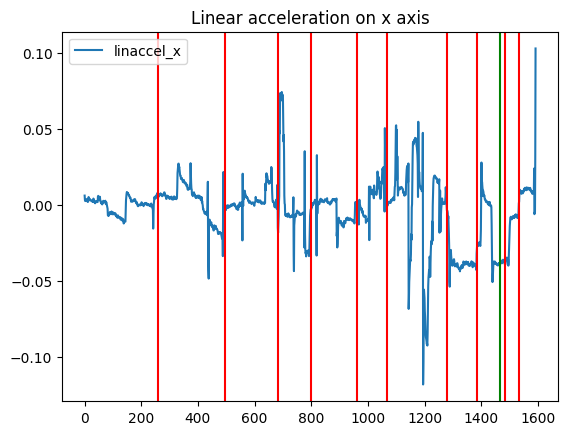

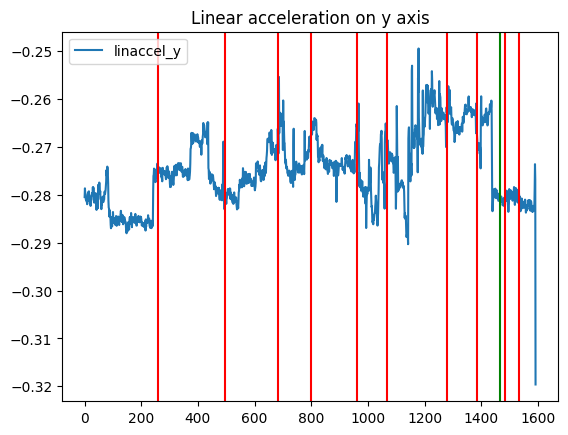

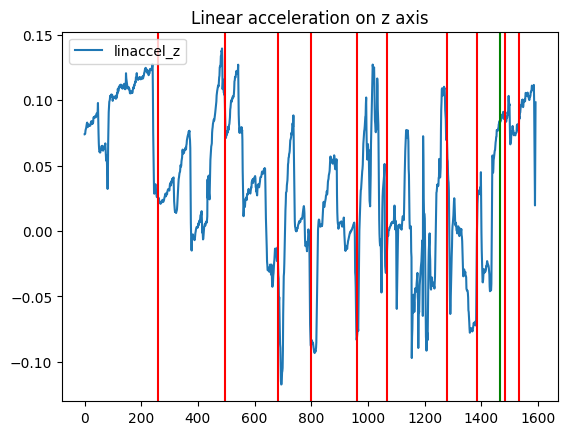

In [1518]:
print(imuChairBack_ama.describe())
print(imuChairBack_ama.nunique())

imuChairBack_ama.plot(y=[1], title="Linear acceleration on x axis")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

imuChairBack_ama.plot(y=[2], title="Linear acceleration on y axis")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

imuChairBack_ama.plot(y=[3], title="Linear acceleration on z axis")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

### Pokreti ruku

              time   linaccel_x   linaccel_y   linaccel_z    gravity_x  \
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000   
mean    796.000000    -0.032263    -0.011230    -0.018743    -1.527228   
std     460.003804     0.097749     0.053243     0.051408     1.987154   
min       0.000000    -0.386490    -0.183536    -0.359755    -8.884936   
25%     398.000000    -0.109120    -0.043195    -0.041920    -1.502183   
50%     796.000000    -0.079282    -0.015560    -0.007407    -0.880284   
75%    1194.000000     0.076232     0.016481     0.010971    -0.454200   
max    1592.000000     0.172947     0.493497     0.134892     0.570094   

         gravity_y    gravity_z       gyro_x       gyro_y       gyro_z  \
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000   
mean      1.638933     9.106566     0.014068    -0.058388    -0.115507   
std       0.712222     1.674832     1.672018     4.092935     2.038102   
min      -6.110684    -0.073696   -18

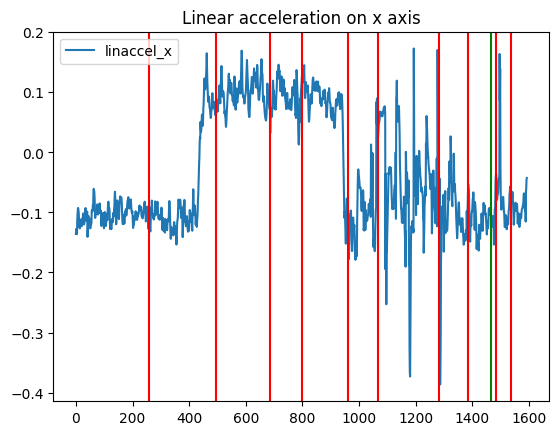

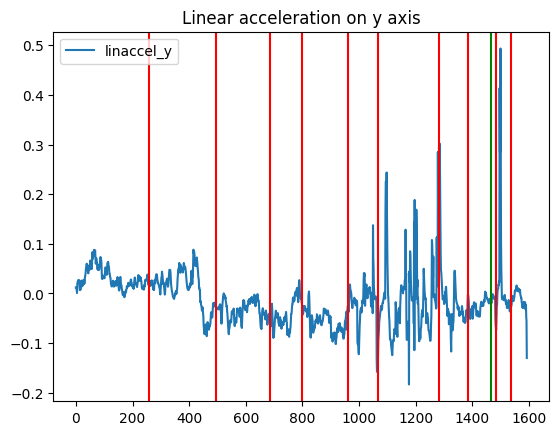

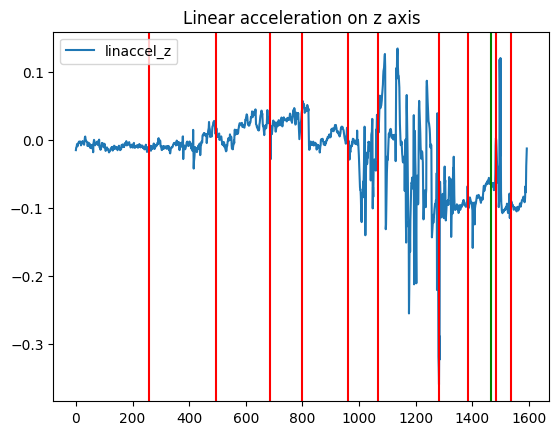

In [1519]:
print(imuLeftHand_ama.describe())
print(imuLeftHand_ama.nunique())


imuLeftHand_ama.plot(y=[1], title="Linear acceleration on x axis")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

imuLeftHand_ama.plot(y=[2], title="Linear acceleration on y axis")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

imuLeftHand_ama.plot(y=[3], title="Linear acceleration on z axis")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

              time   linaccel_x   linaccel_y   linaccel_z    gravity_x  \
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000   
mean    796.000000    -0.029012    -0.018794     0.014770     3.179452   
std     460.003804     0.117294     0.056509     0.022354     0.938289   
min       0.000000    -0.223783    -0.209660    -0.195717     1.566005   
25%     398.000000    -0.048810    -0.051428     0.011071     2.681867   
50%     796.000000    -0.034185    -0.011605     0.016130     2.990396   
75%    1194.000000    -0.021175     0.002660     0.021932     3.226472   
max    1592.000000     3.879141     0.565521     0.277115     9.506312   

         gravity_y    gravity_z       gyro_x       gyro_y       gyro_z  \
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000   
mean      1.615689     8.991038     0.022903    -0.061513    -0.021390   
std       0.594545     0.871095     1.248700     3.055654     2.220615   
min      -5.123683    -0.681593   -18

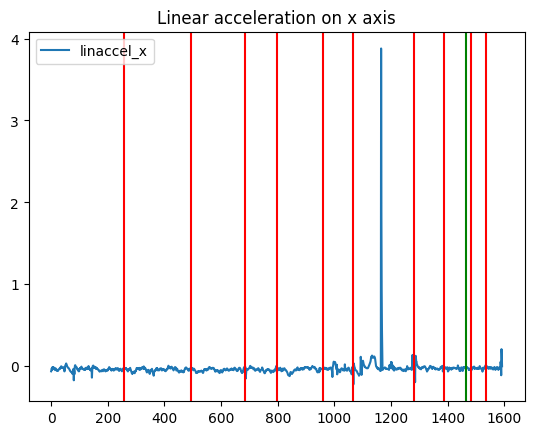

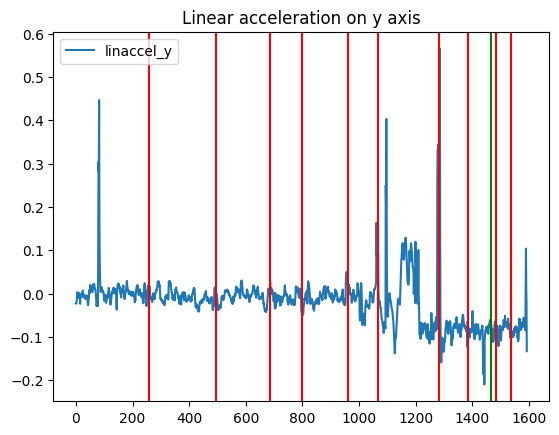

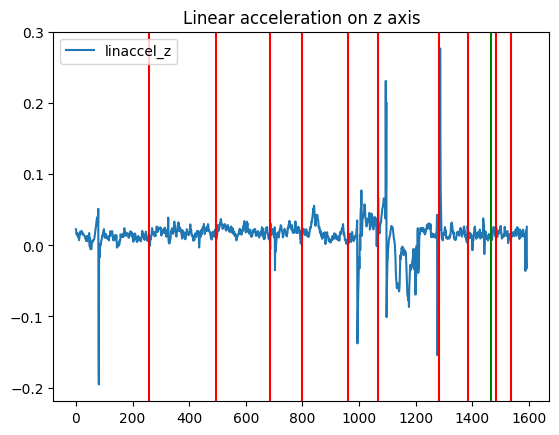

In [1520]:
print(imuRightHand_ama.describe())
print(imuRightHand_ama.nunique())


imuRightHand_ama.plot(y=[1], title="Linear acceleration on x axis")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

imuRightHand_ama.plot(y=[2], title="Linear acceleration on y axis")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

imuRightHand_ama.plot(y=[3], title="Linear acceleration on z axis")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

### Pokreti glave

              time        rot_x   rot_y        rot_z
count  1592.000000  1592.000000  1592.0  1592.000000
mean    795.500000     0.000091     0.0    -0.035702
std     459.715129     0.005486     0.0     0.144387
min       0.000000    -0.064739     0.0    -1.335159
25%     397.750000     0.000000     0.0     0.000000
50%     795.500000     0.000000     0.0     0.000000
75%    1193.250000     0.000000     0.0     0.000000
max    1591.000000     0.125962     0.0     0.696168
time     1592
rot_x     176
rot_y       1
rot_z     387
dtype: int64


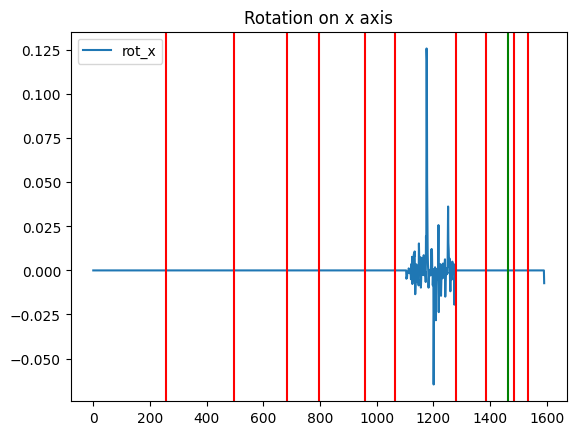

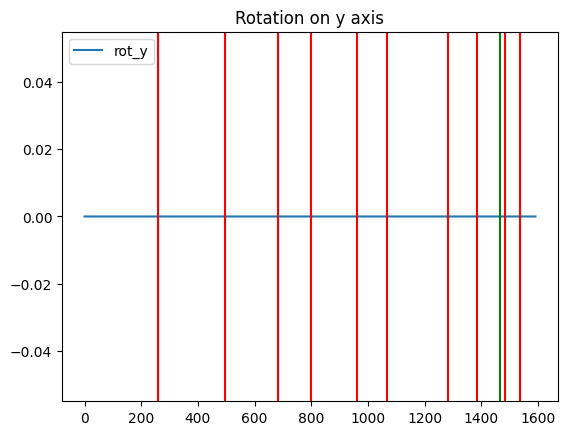

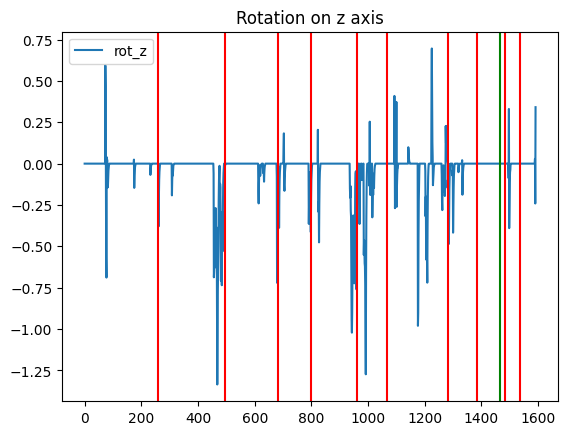

In [1521]:
print(imuHead_ama.describe())
print(imuHead_ama.nunique())


imuHead_ama.plot(y=[1], title="Rotation on x axis")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

imuHead_ama.plot(y=[2], title="Rotation on y axis")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

imuHead_ama.plot(y=[3], title="Rotation on z axis")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

Rotacija na x i y osi je skoro ne postojeća što bi moglo značiti da senzor nije dobro mjerio, ali nemamo kako zamijeniti podatke pošto ne znamo kako se igrač zaista ponašao tijekom igre.

### Tipkovnica

              time  buttons_pressed
count  1593.000000       1593.00000
mean    796.000000          0.31866
std     460.003804          0.78579
min       0.000000          0.00000
25%     398.000000          0.00000
50%     796.000000          0.00000
75%    1194.000000          0.25000
max    1592.000000          8.00000
time               1593
buttons_pressed      65
dtype: int64


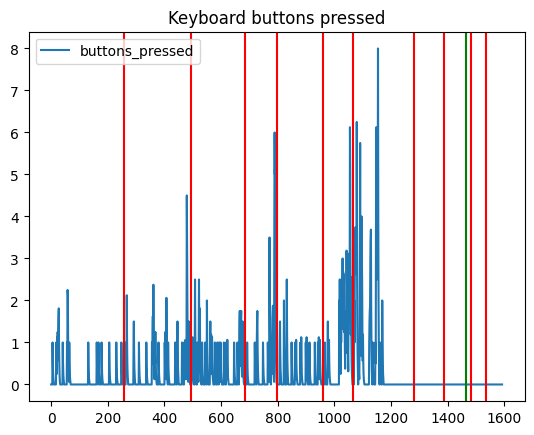

In [1522]:
print(keyboard_ama.describe())
print(keyboard_ama.nunique())

keyboard_ama.plot(y=[1], title="Keyboard buttons pressed")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

Nedostaju podaci od oko 1200 sekunde nadalje što se može zaključiti iz toga da je igrač umro nekoliko puta nakon toga, a to je nemoguće ako ne kontrolira
svojeg heroja. Nedostajeće vrijednosti će se morati izbaciti jer ne postoji drugačiji način da se zamijene pošto se radi o vrijednostima koje se mjere u stvarnom vremenu.

### Miš

              time  mouse_movement  mouse_clicks
count  1592.000000     1592.000000   1592.000000
mean    795.500000     1109.902018      1.831619
std     459.715129     1196.247544      1.979698
min       0.000000        0.000000      0.000000
25%     397.750000        0.000000      0.000000
50%     795.500000      921.687241      1.250000
75%    1193.250000     1802.494849      3.265625
max    1591.000000     9927.175153      8.062500
time              1592
mouse_movement    1133
mouse_clicks       121
dtype: int64


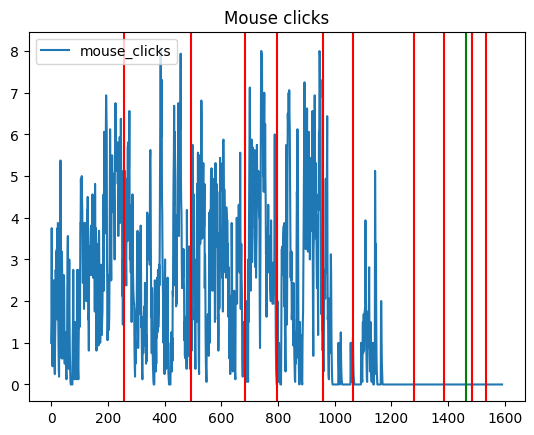

In [1523]:
print(mouse_ama.describe())
print(mouse_ama.nunique())

mouse_ama.plot(y=[2], title="Mouse clicks")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

Kao i za tipkovnicu, mjerenja miša staju oko 1200-te sekunde te se i te nedostajuće vrijednosti izbacuju iz skupa podataka.

### Zasićenost kisikom

              time         spo2
count  1585.000000  1585.000000
mean    797.000000    98.862583
std     457.694403     0.764425
min       5.000000    96.160809
25%     401.000000    98.358252
50%     797.000000    99.018166
75%    1193.000000    99.513776
max    1589.000000    99.855068
time    1585
spo2    1534
dtype: int64


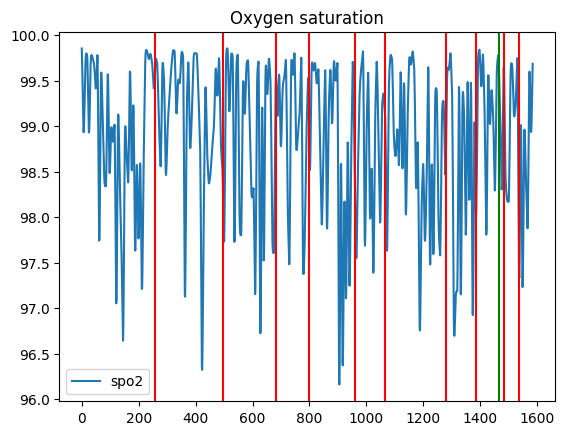

In [1524]:
print(o2Saturation_ama.describe())
print(o2Saturation_ama.nunique())

o2Saturation_ama.plot(y=[1], title="Oxygen saturation")
for i in kills_m3:
    plt.axvline(i, color = 'g')

for i in deaths_m3:
    plt.axvline(i, color = 'r')

## Komentari

Skupovi podataka ovog zadatka su mjereni u stvarnom vremenu pa ih je najbolje prikazati linijskim grafom s ovisnošću o vremenu. Podaci su kvalitetni pošto imamo nemamo uopće null vrijednosti i jedini rastući stupac je vrijeme. Stršeće podatke je teško uočiti jer neznamo kako su se igrači u stvarnosti ponašali, a podaci su unutar očekivanih granica.